### 환경준비

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import warnings    # 경고메시지 제외
warnings.filterwarnings(action='ignore')

C:\Users\qrdls\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [5]:
# battery_power: 배터리 용량
# blue: 블루투스 유뮤 
# clock_speed: 클럭 속도
# dual_sim: 듀얼심 지원여부
# fc: 전면 카메라 메가 픽셀
# four_g: 4G여부
# int_memory: 내부 메모리(기가바이트 단위)
# m_dep: 휴대폰 두께
# mobile_wt: 휴대폰 무게
# n_cores: 프로세서 코어 수
# pc: 기본 카메라 메가픽셀 수
# px_height: 픽셀 높이
# px_width: 픽셀 너비
# ram: 램 용량
# sc_h: 스크린 높이
# sc_w: 스크린 너비
# talk_time: 배터리 지속시간
# three_g: 3G 지원여부
# touch_screen: 터치스크린 유무
# wifi: 와이파이 유무

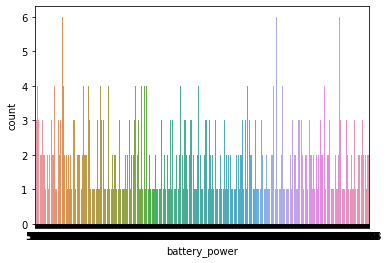

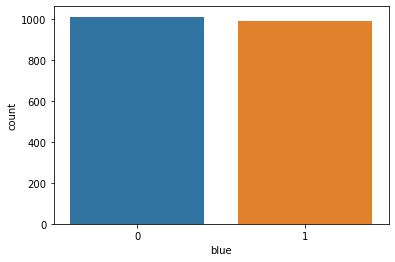

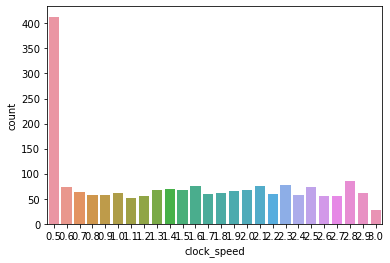

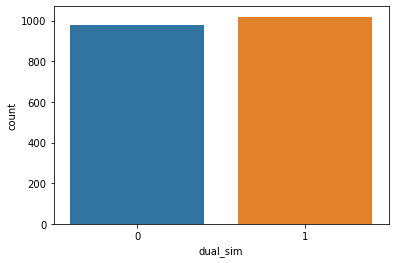

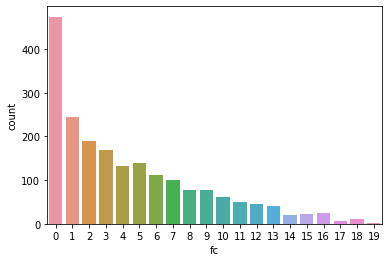

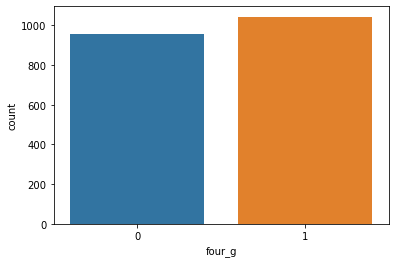

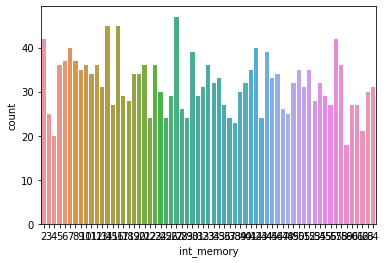

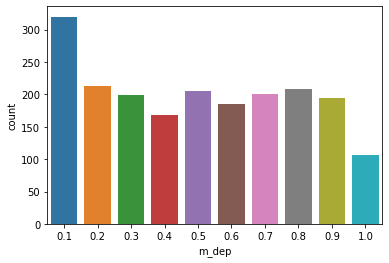

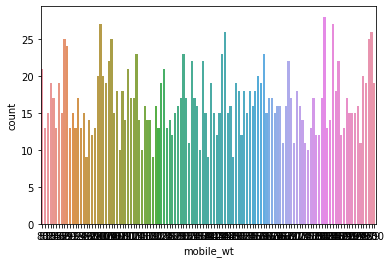

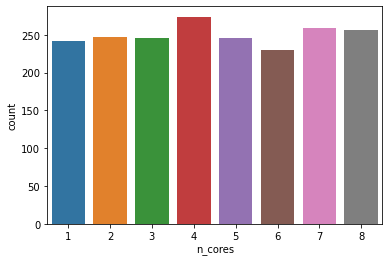

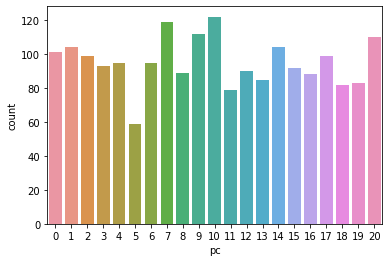

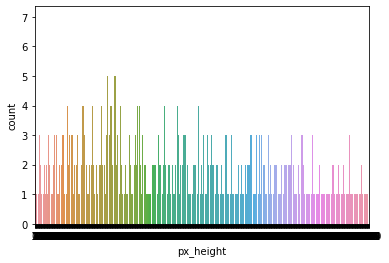

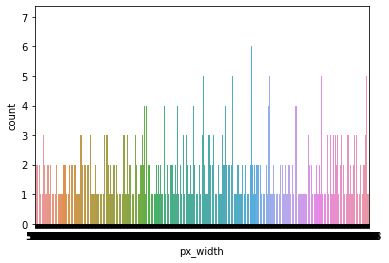

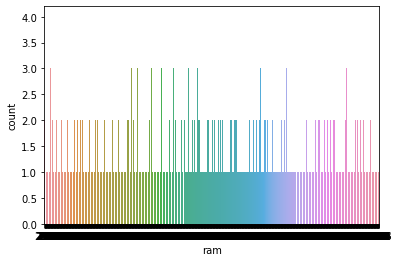

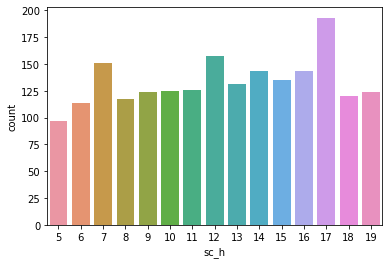

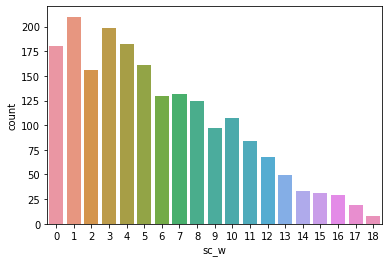

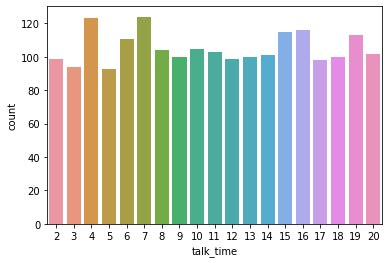

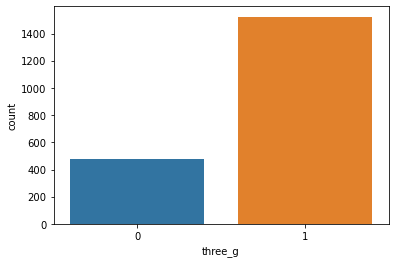

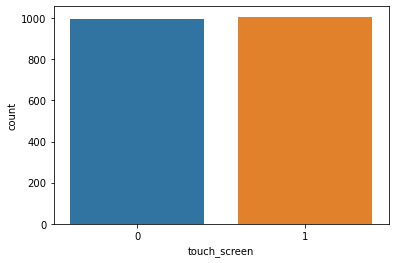

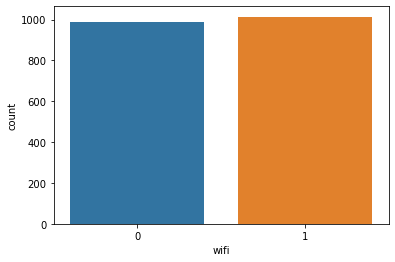

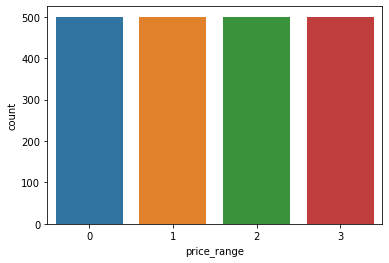

In [6]:
import seaborn as sns
columns = list(data.columns)

for i in columns:
    sns.countplot(data[i])
    plt.show()

In [7]:
### 결측치 확인

In [8]:
data.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [9]:
test.isna().sum()

id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

### target 설정

In [10]:
target = "price_range"
y_train = data[target]
x_train = data.drop(target,axis = 1)

### 가변수화는 필요없어보임 (범주형은 모두 1,0으로 설정돼있음)

### train, val 분리

In [11]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2)

### LinearRegression

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
model1 = LinearRegression()
model1.fit(x_train, y_train)
pred1 = model1.predict(x_val)
pred1 = np.round(pred1)

In [14]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

#### 성능평가

In [15]:
print("mse:",mean_squared_error(y_val,pred1))
print("rmse:",mean_squared_error(y_val,pred1,squared = False))
print("mae:",mean_absolute_error(y_val, pred1))
print("mape:",mean_absolute_percentage_error(y_val, pred1))
print("r2_score:",r2_score(y_val, pred1))

mse: 0.13
rmse: 0.36055512754639896
mae: 0.13
mape: 213920982300098.56
r2_score: 0.8988676089482718


In [16]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model1,x_train, y_train, cv = 10)
print("교차검증 :",scores.mean())

교차검증 : 0.9148747680446391


### KNeighborsRegressor

In [17]:
from sklearn.neighbors import KNeighborsRegressor    
model2 = KNeighborsRegressor()

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train_s = scaler.fit_transform(x_train)
x_val_s = scaler.transform(x_val)

In [19]:
model2.fit(x_train_s , y_train)

KNeighborsRegressor()

In [20]:
pred2 = model2.predict(x_val_s)
pred2 = np.round(pred2)

#### 성능평가

In [21]:
print("mse:",mean_squared_error(y_val,pred2))
print("rmse:",mean_squared_error(y_val,pred2,squared = False))
print("mae:",mean_absolute_error(y_val, pred2))
print("mape:",mean_absolute_percentage_error(y_val, pred2))
print("r2_score:",r2_score(y_val, pred2))

mse: 0.805
rmse: 0.897217922246318
mae: 0.685
mape: 1002050917089935.4
r2_score: 0.37375711694891345


#### 튜닝하기

In [22]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [23]:
params = {'n_neighbors' : range(1,10),'metric' : ['minkowski', 'euclidean', 'manhattan']}

md = KNeighborsRegressor()

md_gs = GridSearchCV(md, params, cv = 10, scoring = 'neg_mean_absolute_error')
md_gs.fit(x_train_s,y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': range(1, 10)},
             scoring='neg_mean_absolute_error')

In [24]:
pred3 = md_gs.predict(x_val_s)
pred3 = np.round(pred3)

In [25]:
print("mse:",mean_squared_error(y_val,pred3))
print("rmse:",mean_squared_error(y_val,pred3,squared = False))
print("mae:",mean_absolute_error(y_val, pred3))
print("mape:",mean_absolute_percentage_error(y_val, pred3))
print("r2_score:",r2_score(y_val, pred3))

mse: 0.705
rmse: 0.8396427811873333
mae: 0.65
mape: 1035827914295214.1
r2_score: 0.45155126391178135


In [26]:
##### 전체적으로 KNN의 성능은 좋지 않은 것을 볼 수 있었다. 왜일까?

### DecisionTreeRegressor

In [27]:
from sklearn.tree import DecisionTreeRegressor

In [28]:
model3 = DecisionTreeRegressor()
model3.fit(x_train, y_train)
pred4 = model3.predict(x_val)
pred4 = np.round(pred4)

In [29]:
print("mse:",mean_squared_error(y_val,pred4))
print("rmse:",mean_squared_error(y_val,pred4,squared = False))
print("mae:",mean_absolute_error(y_val, pred4))
print("mape:",mean_absolute_percentage_error(y_val, pred4))
print("r2_score:",r2_score(y_val, pred4))

mse: 0.155
rmse: 0.39370039370059057
mae: 0.155
mape: 101330991615836.23
r2_score: 0.8794190722075548


In [30]:
params = {'min_samples_leaf' : range(10,100,10), 'max_depth' : range(1,10,2)}

md2 = DecisionTreeRegressor()
md2_gs = GridSearchCV(md2, params, cv = 10)
md2_gs.fit(x_train,y_train)
pred5 = md2_gs.predict(x_val)
pred5 = np.round(pred5)

In [31]:
print("mse:",mean_squared_error(y_val,pred5))
print("rmse:",mean_squared_error(y_val,pred5,squared = False))
print("mae:",mean_absolute_error(y_val, pred5))
print("mape:",mean_absolute_percentage_error(y_val, pred5))
print("r2_score:",r2_score(y_val, pred5))

mse: 0.1425
rmse: 0.37749172176353746
mae: 0.1425
mape: 90071992547410.0
r2_score: 0.8891433405779132


### SVM

In [32]:
from sklearn.svm import SVR

In [33]:
model4 = SVR()
model4.fit(x_train_s, y_train)
pred6 = model4.predict(x_val_s)
pred6 = np.round(pred6)

In [34]:
print("mse:",mean_squared_error(y_val,pred6))
print("rmse:",mean_squared_error(y_val,pred6,squared = False))
print("mae:",mean_absolute_error(y_val, pred6))
print("mape:",mean_absolute_percentage_error(y_val, pred6))
print("r2_score:",r2_score(y_val, pred6))

mse: 0.17
rmse: 0.41231056256176607
mae: 0.17
mape: 292733975779082.25
r2_score: 0.8677499501631245


#### 튜닝하기

In [35]:
params = {'C' : range(11,15), 'gamma' : np.linspace(0.005, 0.02, 5)}

md3 = SVR()
md3_gs = GridSearchCV(md3, params, cv = 10)
md3_gs.fit(x_train_s,y_train)
pred7 = md3_gs.predict(x_val_s)
pred7 = np.round(pred7)

In [36]:
md3_gs.best_estimator_

SVR(C=14, gamma=0.005)

In [37]:
print("mse:",mean_squared_error(y_val,pred7))
print("rmse:",mean_squared_error(y_val,pred7,squared = False))
print("mae:",mean_absolute_error(y_val, pred7))
print("mape:",mean_absolute_percentage_error(y_val, pred7))
print("r2_score:",r2_score(y_val, pred7))

mse: 0.1375
rmse: 0.37080992435478316
mae: 0.1375
mape: 213920982300098.56
r2_score: 0.8930330479260566


### RandomForest

In [38]:
from sklearn.ensemble import RandomForestRegressor

In [39]:
model5 = RandomForestRegressor()
model5.fit(x_train, y_train)
pred8 = model5.predict(x_val)
pred8 = np.round(pred8)

In [40]:
print("mse:",mean_squared_error(y_val,pred8))
print("rmse:",mean_squared_error(y_val,pred8,squared = False))
print("mae:",mean_absolute_error(y_val, pred8))
print("mape:",mean_absolute_percentage_error(y_val, pred8))
print("r2_score:",r2_score(y_val, pred8))

mse: 0.0875
rmse: 0.2958039891549808
mae: 0.0875
mape: 90071992547409.95
r2_score: 0.9319301214074905


In [ ]:
### 최고 성능이다.

### 튜닝하기

In [41]:
params = {'n_estimators':range(2,6),'min_samples_leaf' : range(1,50,10), 'max_depth' : range(12,17,2)}

md4 = RandomForestRegressor()
md4_gs = GridSearchCV(md4, params, cv = 10)
md4_gs.fit(x_train,y_train)
pred9 = md4_gs.predict(x_val)
pred9 = np.round(pred9)

In [42]:
md4_gs.best_estimator_

RandomForestRegressor(max_depth=16, min_samples_leaf=11, n_estimators=4)

In [43]:
print("mse:",mean_squared_error(y_val,pred9))
print("rmse:",mean_squared_error(y_val,pred9,squared = False))
print("mae:",mean_absolute_error(y_val, pred9))
print("mape:",mean_absolute_percentage_error(y_val, pred9))
print("r2_score:",r2_score(y_val, pred9))

mse: 0.1025
rmse: 0.32015621187164245
mae: 0.1025
mape: 56294995342131.26
r2_score: 0.9202609993630604


In [44]:
#오히려 튜닝 후 성능이 떨어졌다. train데이터에 과적합 되지않았나 라고 추측해본다

### XGB

In [45]:
from xgboost import XGBRegressor

In [46]:
model6 = XGBRegressor()
model6.fit(x_train, y_train)
pred10 = model6.predict(x_val)
pred10 = np.round(pred10)

In [47]:
print("mse:",mean_squared_error(y_val,pred10))
print("rmse:",mean_squared_error(y_val,pred10,squared = False))
print("mae:",mean_absolute_error(y_val, pred10))
print("mape:",mean_absolute_percentage_error(y_val, pred10))
print("r2_score:",r2_score(y_val, pred10))

mse: 0.1025
rmse: 0.32015621187164245
mae: 0.1025
mape: 78812993478983.72
r2_score: 0.9202609993630604


#### 튜닝하기

In [48]:
params = { 'max_depth':[3,5,8], 'n_estimators':[50,100,150], 'learning_rate':[0.01,0.1,0.2]}

md5 = XGBRegressor()
md5_gs = GridSearchCV(md5, params, cv = 10)
md5_gs.fit(x_train,y_train)
pred11 = md5_gs.predict(x_val)
pred11 = np.round(pred11)

In [49]:
md5_gs.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=50, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [50]:
print("mse:",mean_squared_error(y_val,pred11))
print("rmse:",mean_squared_error(y_val,pred11,squared = False))
print("mae:",mean_absolute_error(y_val, pred11))
print("mape:",mean_absolute_percentage_error(y_val, pred11))
print("r2_score:",r2_score(y_val, pred11))

mse: 0.09
rmse: 0.3
mae: 0.09
mape: 67553994410557.48
r2_score: 0.9299852677334189
